In [2]:
import os
import time
import itertools
import numpy as np
import mediapy as media
import matplotlib.pyplot as plt
import mujoco

# --- MuJoCo GPU 渲染配置 (可选，但推荐在支持GPU的环境下设置) ---
# 在本地环境中，通常不需要像Colab那样复杂的ICD配置。
# 确保你的NVIDIA驱动已正确安装。
# 设置环境变量，强制MuJoCo使用EGL渲染后端（需要GPU支持）
# 如果你的系统没有GPU或EGL配置有问题，可以注释掉这行，MuJoCo会尝试使用CPU渲染。
print('Setting environment variable to use GPU rendering (if available):')
os.environ['MUJOCO_GL'] = 'egl'

np.set_printoptions(precision=3, suppress=True, linewidth=100)
print('FFmpeg and Mediapy are required for video rendering.')
print('Please ensure FFmpeg is installed and accessible in your system PATH.')



# --- MuJoCo 渲染示例 ---
print('\nStarting MuJoCo rendering example...')
# 定义一个简单的 MuJoCo 模型 XML 字符串
# 这是一个包含一个平面和一个球体的模型
xml_string = """
<mujoco model="hello_world">
  <compiler angle="radian"/>
  <worldbody>
    <light pos="0 0 1"/>
    <geom name="floor" type="plane" size="0 0 0.1" rgba="0.9 0.9 0.9 1"/>
    <body name="ball" pos="0 0 0.5">
      <joint name="ball_joint" type="free"/>
      <geom name="ball_geom" type="sphere" size="0.1" rgba="0.7 0.3 0.3 1"/>
    </body>
  </worldbody>
  <actuator>
    <motor joint="ball_joint" gear="0 0 0 0 1"/>
  </actuator>
</mujoco>
"""


# 从 XML 字符串创建 MuJoCo 模型
model = mujoco.MjModel.from_xml_string(xml_string)
# 创建 MuJoCo 数据对象
data = mujoco.MjData(model)

# 创建 MuJoCo 渲染器
# 如果 MUJOCO_GL=egl 设置成功，这里会使用GPU
# 如果没有设置或失败，MuJoCo会回退到CPU渲染
renderer = mujoco.Renderer(model)

# 模拟并渲染帧
frames = []
duration = 2 # 模拟时长 (秒)
framerate = 60 # 帧率

print(f"Simulating for {duration} seconds at {framerate} FPS...")
while data.time < duration:
    mujoco.mj_step(model, data) # 执行一步物理模拟
    renderer.update_scene(data) # 更新渲染场景
    pixels = renderer.render()  # 获取当前帧的像素数据
    frames.append(pixels)       # 将帧添加到列表中

print(f"Generated {len(frames)} frames.")

# --- 将渲染的视频保存到当前文件夹 ---
output_filename = 'mujoco_simulation_video.mp4'
print(f"Saving video to: {os.path.abspath(output_filename)}")

try:
    media.write_video(output_filename, frames, fps=framerate)
    print(f"Video saved successfully as '{output_filename}' in the current directory.")
except Exception as e:
    print(f"Error saving video: {e}")
    print("Please ensure FFmpeg is installed and accessible in your system PATH.")

print('MuJoCo example finished.')


Setting environment variable to use GPU rendering (if available):
FFmpeg and Mediapy are required for video rendering.
Please ensure FFmpeg is installed and accessible in your system PATH.

Starting MuJoCo rendering example...
Simulating for 2 seconds at 60 FPS...
Generated 1000 frames.
Saving video to: c:\Users\13613\Desktop\Naoji\EEG-ATCNet\ZHUSHI\mujoco_simulation_video.mp4
Video saved successfully as 'mujoco_simulation_video.mp4' in the current directory.
MuJoCo example finished.


In [18]:


# 这里需要注意的是
xml="""
<mujoco>
  <worldbody>
    <geom name="redbox" pos="0 0 0" type="box" size="0.4 0.4 0.4" rgba="1 0 0 1"/>
    <geom name="greensphere" pos="0.2 0.2 0.2" type="sphere" size="0.1" rgba="0 1 0 1"/>
    <geom name="greensphere2" pos="0.1 0.1 0.1" type="sphere" size="0.05" rgba="1 1 0 1"/>
  </worldbody>
</mujoco>
"""

model=mujoco.MjModel.from_xml_string(xml)


#  <mujoco>、物理元素容器 <worldbody>，并特别指出 MJCF 通过默认值简化了模型定义（例如，几何体默认在原点且默认为球体）。最后，它提到了将 XML 字符串加载为可用于模拟的内部二进制模型实例的过程





In [20]:
model.ngeom
model.geom('greensphere2')

<_MjModelGeomViews
  bodyid: array([0])
  conaffinity: array([1])
  condim: array([3])
  contype: array([1])
  dataid: array([-1])
  friction: array([1.   , 0.005, 0.   ])
  gap: array([0.])
  group: array([0])
  id: 2
  margin: array([0.])
  matid: array([-1])
  name: 'greensphere2'
  pos: array([0.1, 0.1, 0.1])
  priority: array([0])
  quat: array([1., 0., 0., 0.])
  rbound: array([0.05])
  rgba: array([1., 1., 0., 1.], dtype=float32)
  sameframe: array([3], dtype=uint8)
  size: array([0.05, 0.  , 0.  ])
  solimp: array([0.9  , 0.95 , 0.001, 0.5  , 2.   ])
  solmix: array([1.])
  solref: array([0.02, 1.  ])
  type: array([2])
  user: array([], dtype=float64)
>

In [22]:
model.geom('greensphere2').rgba

array([1., 1., 0., 1.], dtype=float32)

In [25]:
id = mujoco.mj_name2id(model, mujoco.mjtObj.mjOBJ_GEOM, 'greensphere2')
model.geom_rgba[id, :]

array([1., 1., 0., 1.], dtype=float32)

In [ ]:
# mjData
# 包含了状态以及依赖于状态的量 状态由时间 广义位置 广义速度组成 分别对应data.time data.qpos data.qvel
# 为了创建一个新的mjData对象 我们


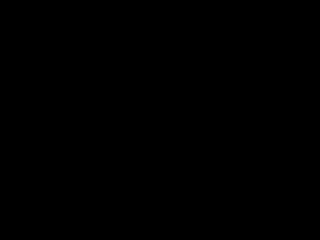

In [26]:
xml = """
<mujoco>
  <worldbody>
    <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
    <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
  </worldbody>
</mujoco>
"""
# Make model and data
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)

# Make renderer, render and show the pixels
with mujoco.Renderer(model) as renderer:
  media.show_image(renderer.render())


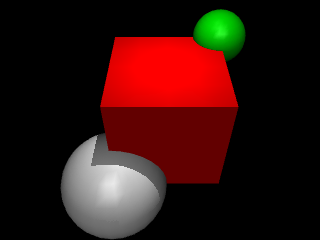

In [36]:
xml = """
<mujoco>
  <worldbody>
    <light name="top" pos="0 0 1"/>
    <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
    <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
    <geom name="green_sphere2" pos="-.2 -.2 -.2" size=".2" rgba="1 1 1 1"/>
  </worldbody>
</mujoco>
"""
model=mujoco.MjModel.from_xml_string(xml)
data=mujoco.MjData(model)

with mujoco.Renderer(model) as renderer:
    mujoco.mj_forward(model,data)  
    renderer.update_scene(data)
    media.show_image(renderer.render())




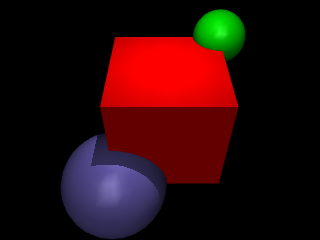

In [57]:
model.geom('green_sphere2').rgba[:3]=np.random.rand(3)

with mujoco.Renderer(model) as renderer:
    renderer.update_scene(data)
    media.show_image(renderer.render())





In [59]:
duration = 3.8  # (seconds)
framerate = 60  # (Hz)

# Simulate and display video.
frames = []
mujoco.mj_resetData(model, data)  # Reset state and time


with mujoco.Renderer(model) as renderer:
  while data.time < duration:
    mujoco.mj_step(model, data)
    if len(frames) < data.time * framerate:
      renderer.update_scene(data)
      pixels = renderer.render()
      frames.append(pixels)

media.show_video(frames, fps=framerate)

In [70]:
xml="""

<mujoco>
  <worldbody>
    <light name="top" pos="0 0 1"/>
    <body name="red_box" pos="0 0 -30">
      <joint name="swing" type="hinge" axis="1 1 0" pos="-0.2 -0.2 -0.2"/>
      <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
      <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
      <geom name="green_sphere2" pos="-.2 -.2 -.2" size=".2" rgba="1 1 1 1"/>
    </body>
  </worldbody>
</mujoco>

"""

model=mujoco.MjModel.from_xml_string(xml)
data=mujoco.MjData(model)

scene_option=mujoco.MjvOption()
scene_option.flags[mujoco.mjtVisFlag.mjVIS_JOINT]=True


duration=3.8
framerate=60

frames=[]

mujoco.mj_resetData(model,data)

with mujoco.Renderer(model) as renderer:
    while data.time < duration:
        mujoco.mj_step(model,data)
        if len(frames) < data.time * framerate:
            renderer.update_scene(data,scene_option=scene_option)
            pixels=renderer.render()
            frames.append(pixels)

media.show_video(frames,fps=framerate)


In [86]:
xml = """
<mujoco>
  <worldbody>
    <light name="top" pos="0 0 1"/>
    <body name="box_and_sphere" euler="0 0 -30">
      <joint name="swing" type="hinge" axis="1 -1 0" pos="-.2 -.2 -.2"/>
      <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
      <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
    </body>
  </worldbody>
</mujoco>
"""
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)

# enable joint visualization option:
scene_option = mujoco.MjvOption()
scene_option.flags[mujoco.mjtVisFlag.mjVIS_JOINT] = True

duration = 4.8  # (seconds)
framerate = 60  # (Hz)

# Simulate and display video.
frames = []
mujoco.mj_resetData(model, data)
with mujoco.Renderer(model) as renderer:
  while data.time < duration:
    mujoco.mj_step(model, data)
    if len(frames) < data.time * framerate:
      renderer.update_scene(data, scene_option=scene_option)
      pixels = renderer.render()
      frames.append(pixels)

media.show_video(frames, fps=framerate)

model.opt.timestep = 0.01  # 设置模拟时间步长为0.01秒


In [85]:
print('default gravity', model.opt.gravity)
model.opt.gravity = (0, 0, -10)
print('flipped gravity', model.opt.gravity)

# Simulate and display video.
frames = []
mujoco.mj_resetData(model, data)
with mujoco.Renderer(model) as renderer:
  while data.time < duration:
    mujoco.mj_step(model, data)
    if len(frames) < data.time * framerate:
      renderer.update_scene(data, scene_option=scene_option)
      pixels = renderer.render()
      frames.append(pixels)

media.show_video(frames, fps=60)


default gravity [ 0.  0. 10.]
flipped gravity [  0.   0. -10.]


In [100]:
xml = """
<mujoco>
  <option gravity="0 0 -15"/>

  <worldbody>
    <light name="top" pos="0 0 1"/>
    <body name="box_and_sphere" euler="0 0 -30">
      <joint name="swing" type="hinge" axis="1 -1 0" pos="-.2 -.2 -.2"/>
      <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
      <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
    </body>
  </worldbody>
</mujoco>
"""



model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)

# enable joint visualization option:
scene_option = mujoco.MjvOption()
scene_option.flags[mujoco.mjtVisFlag.mjVIS_JOINT] = True

frames = []
mujoco.mj_resetData(model, data)
with mujoco.Renderer(model) as renderer:
  while data.time < duration:
    mujoco.mj_step(model, data)
    if len(frames) < data.time * framerate:
      renderer.update_scene(data, scene_option=scene_option)
      pixels = renderer.render()
      frames.append(pixels)

media.show_video(frames, fps=60)

In [103]:
print('Total number of DoFs in the model:', model.nv)
print('Generalized positions:', data.qpos)
print('Generalized velocities:', data.qvel)



Total number of DoFs in the model: 1
Generalized positions: [-0.257]
Generalized velocities: [-3.835]



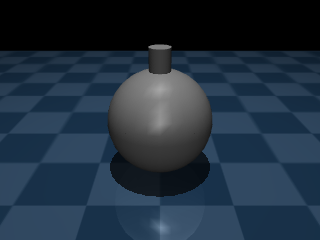

In [115]:
tippe_top = """
<mujoco model="tippe top">
  <option integrator="RK4"/>

  <asset>
    <texture name="grid" type="2d" builtin="checker" rgb1=".1 .2 .3"
     rgb2=".2 .3 .4" width="300" height="300"/>
    <material name="grid" texture="grid" texrepeat="8 8" reflectance=".2"/>
  </asset>

  <worldbody>
    <geom size=".2 .2 .01" type="plane" material="grid"/>
    <light pos="0 0 .6"/>
    <camera name="closeup" pos="0 -.1 .07" xyaxes="1 0 0 0 1 2"/>
    <body name="top" pos="0 0 .02">
      <freejoint/>
      <geom name="ball" type="sphere" size=".02" />
      <geom name="stem" type="cylinder" pos="0 0 .02" size="0.004 .008"/>
      <geom name="ballast" type="box" size=".023 .023 0.005"  pos="0 0 -.015"
       contype="0" conaffinity="0" group="3"/>
    </body>
  </worldbody>

  <keyframe>
    <key name="spinning" qpos="0 0 0.02 1 0 0 0" qvel="0 0 0 0 1 200" />
  </keyframe>
</mujoco>
"""
model = mujoco.MjModel.from_xml_string(tippe_top)
data = mujoco.MjData(model)




mujoco.mj_forward(model, data)
with mujoco.Renderer(model) as renderer:
  renderer.update_scene(data, camera="closeup")

  media.show_image(renderer.render())

In [182]:
tippe_top = """
<mujoco model="tippe top">
  <option integrator="RK4"/>

  <asset>
    <texture name="grid" type="2d" builtin="checker" rgb1=".1 .2 .3"
     rgb2=".2 .3 .4" width="300" height="300"/>
    <material name="grid" texture="grid" texrepeat="8 8" reflectance=".2"/>
  </asset>

  <worldbody>
    <geom size=".2 .2 .01" type="plane" material="grid"/>
    <light pos="0 0 .6"/>
    <camera name="closeup" pos="0 -.1 .07" xyaxes="1 0 0 0 1 2"/>
    <body name="top" pos="0 0 .02">
      <freejoint/>
      <geom name="ball" type="sphere" size=".02" />
      <geom name="stem" type="cylinder" pos="0 0 .02" size="0.004 .008"/>
      <geom name="ballast" type="box" size=".023 .023 0.005"  pos="0 0 -.015"
       contype="0" conaffinity="0" group="3"/>
    </body>
  </worldbody>

  <keyframe>
    <key name="spinning" qpos="0 0 0.02 1 0 0 0" qvel="0 0 0 0 1 200" />
  </keyframe>
</mujoco>
"""

model = mujoco.MjModel.from_xml_string(tippe_top)
data = mujoco.MjData(model)
duration = 7    # (seconds)
framerate = 60  # (Hz)

# Simulate and display video.
frames = []
mujoco.mj_resetDataKeyframe(model, data, 0)  # Reset the state to keyframe 0

with mujoco.Renderer(model) as renderer:
  while data.time < duration:
    mujoco.mj_step(model, data)
    if len(frames) < data.time * framerate:
      renderer.update_scene(data, "closeup")
      pixels = renderer.render()
      frames.append(pixels)

media.show_video(frames, fps=framerate)

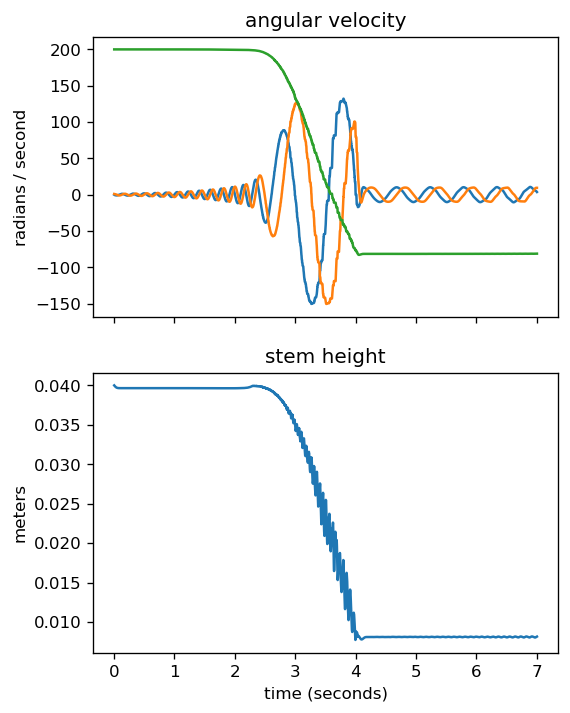

In [183]:
timevals = []
angular_velocity = []
stem_height = []

# Simulate and save data
mujoco.mj_resetDataKeyframe(model, data, 0)
while data.time < duration:
  mujoco.mj_step(model, data)
  timevals.append(data.time)
  angular_velocity.append(data.qvel[3:6].copy())
  stem_height.append(data.geom_xpos[2,2]);

dpi = 120
width = 600
height = 800
figsize = (width / dpi, height / dpi)
_, ax = plt.subplots(2, 1, figsize=figsize, dpi=dpi, sharex=True)

ax[0].plot(timevals, angular_velocity)
ax[0].set_title('angular velocity')
ax[0].set_ylabel('radians / second')

ax[1].plot(timevals, stem_height)
ax[1].set_xlabel('time (seconds)')
ax[1].set_ylabel('meters')
_ = ax[1].set_title('stem height')


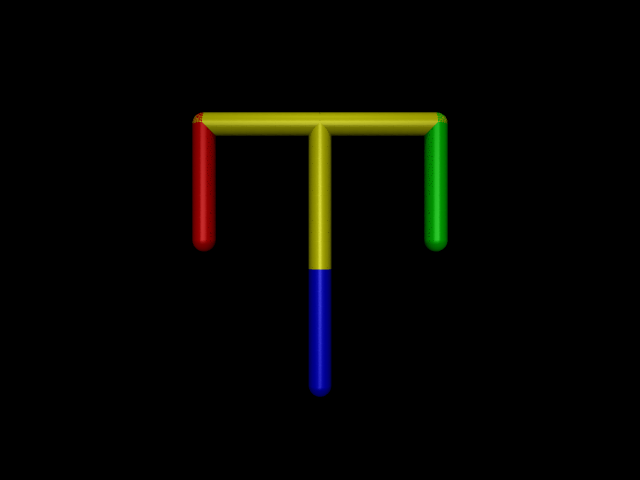

In [184]:
chaotic_pendulum = """
<mujoco>
  <option timestep=".001">
    <flag energy="enable" contact="disable"/>
  </option>

  <default>
    <joint type="hinge" axis="0 -1 0"/>
    <geom type="capsule" size=".02"/>
  </default>

  <worldbody>
    <light pos="0 -.4 1"/>
    <camera name="fixed" pos="0 -1 0" xyaxes="1 0 0 0 0 1"/>
    <body name="0" pos="0 0 .2">
      <joint name="root"/>
      <geom fromto="-.2 0 0 .2 0 0" rgba="1 1 0 1"/>
      <geom fromto="0 0 0 0 0 -.25" rgba="1 1 0 1"/>
      <body name="1" pos="-.2 0 0">
        <joint/>
        <geom fromto="0 0 0 0 0 -.2" rgba="1 0 0 1"/>
      </body>
      <body name="2" pos=".2 0 0">
        <joint/>
        <geom fromto="0 0 0 0 0 -.2" rgba="0 1 0 1"/>
      </body>
      <body name="3" pos="0 0 -.25">
        <joint/>
        <geom fromto="0 0 0 0 0 -.2" rgba="0 0 1 1"/>
      </body>
    </body>
  </worldbody>
</mujoco>
"""
model = mujoco.MjModel.from_xml_string(chaotic_pendulum)
data = mujoco.MjData(model)
height = 480
width = 640

with mujoco.Renderer(model, height, width) as renderer:
  mujoco.mj_forward(model, data)
  renderer.update_scene(data, camera="fixed")

  media.show_image(renderer.render())

In [185]:
# setup
n_seconds = 6
framerate = 30  # Hz
n_frames = int(n_seconds * framerate)
frames = []
height = 240
width = 320

# set initial state
mujoco.mj_resetData(model, data)
data.joint('root').qvel = 10

# simulate and record frames
frame = 0
sim_time = 0
render_time = 0
n_steps = 0
with mujoco.Renderer(model, height, width) as renderer:
  for i in range(n_frames):
    while data.time * framerate < i:
      tic = time.time()
      mujoco.mj_step(model, data)
      sim_time += time.time() - tic
      n_steps += 1
    tic = time.time()
    renderer.update_scene(data, "fixed")
    frame = renderer.render()
    render_time += time.time() - tic
    frames.append(frame)

# print timing and play video
step_time = 1e6*sim_time/n_steps
step_fps = n_steps/sim_time
print(f'simulation: {step_time:5.3g} μs/step  ({step_fps:5.0f}Hz)')
frame_time = 1e6*render_time/n_frames
frame_fps = n_frames/render_time
print(f'rendering:  {frame_time:5.3g} μs/frame ({frame_fps:5.0f}Hz)')
print('\n')

# show video
media.show_video(frames, fps=framerate)

simulation:   1.4 μs/step  (716379Hz)
rendering:    526 μs/frame ( 1901Hz)




C:\Users\13613\AppData\Local\Temp\ipykernel_36372\567113803.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  angle[i] = data.joint('root').qpos


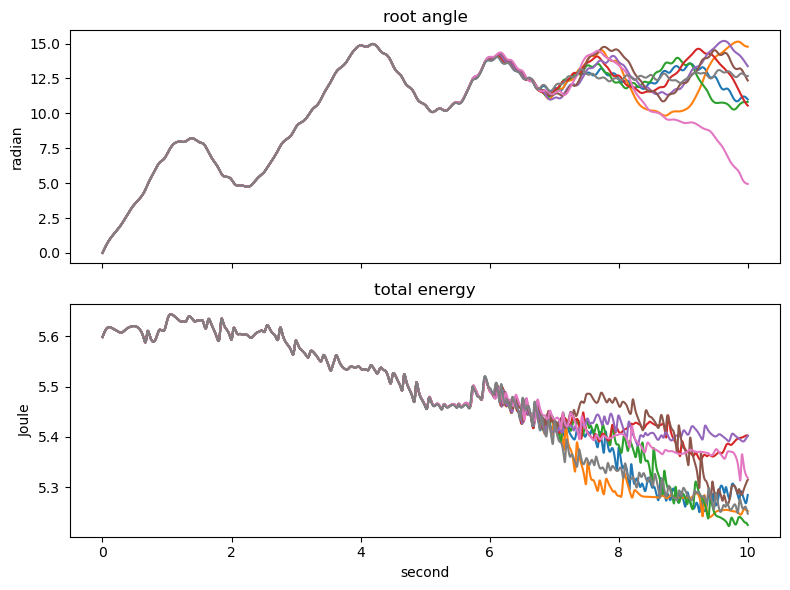

In [186]:
PERTURBATION = 1e-7
SIM_DURATION = 10 # seconds
NUM_REPEATS = 8

# preallocate
n_steps = int(SIM_DURATION / model.opt.timestep)
sim_time = np.zeros(n_steps)
angle = np.zeros(n_steps)
energy = np.zeros(n_steps)

# prepare plotting axes
_, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# simulate NUM_REPEATS times with slightly different initial conditions
for _ in range(NUM_REPEATS):
  # initialize
  mujoco.mj_resetData(model, data)
  data.qvel[0] = 10 # root joint velocity
  # perturb initial velocities
  data.qvel[:] += PERTURBATION * np.random.randn(model.nv)

  # simulate
  for i in range(n_steps):
    mujoco.mj_step(model, data)
    sim_time[i] = data.time
    angle[i] = data.joint('root').qpos
    energy[i] = data.energy[0] + data.energy[1]

  # plot
  ax[0].plot(sim_time, angle)
  ax[1].plot(sim_time, energy)

# finalize plot
ax[0].set_title('root angle')
ax[0].set_ylabel('radian')
ax[1].set_title('total energy')
ax[1].set_ylabel('Joule')
ax[1].set_xlabel('second')
plt.tight_layout()

1000 steps at dt = 10ms
3162 steps at dt = 3.2ms
10000 steps at dt =  1ms
31622 steps at dt = 0.32ms
100000 steps at dt = 0.1ms


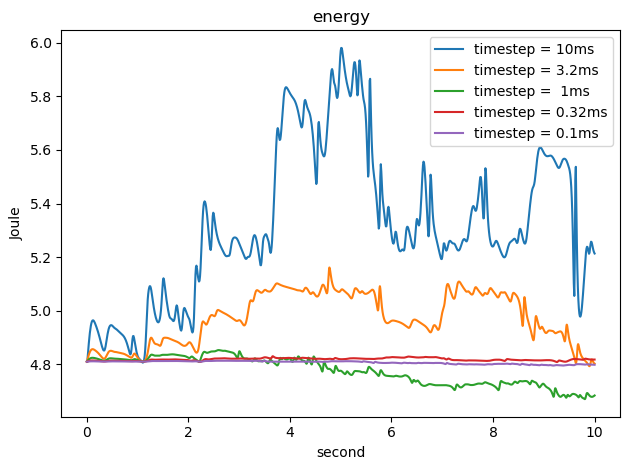

In [187]:
SIM_DURATION = 10 # (seconds)
TIMESTEPS = np.power(10, np.linspace(-2, -4, 5))

# prepare plotting axes
_, ax = plt.subplots(1, 1)

for dt in TIMESTEPS:
   # set timestep, print
  model.opt.timestep = dt

  # allocate
  n_steps = int(SIM_DURATION / model.opt.timestep)
  sim_time = np.zeros(n_steps)
  energy = np.zeros(n_steps)

  # initialize
  mujoco.mj_resetData(model, data)
  data.qvel[0] = 9 # root joint velocity

  # simulate
  print('{} steps at dt = {:2.2g}ms'.format(n_steps, 1000*dt))
  for i in range(n_steps):
    mujoco.mj_step(model, data)
    sim_time[i] = data.time
    energy[i] = data.energy[0] + data.energy[1]

  # plot
  ax.plot(sim_time, energy, label='timestep = {:2.2g}ms'.format(1000*dt))

# finalize plot
ax.set_title('energy')
ax.set_ylabel('Joule')
ax.set_xlabel('second')
ax.legend(frameon=True);
plt.tight_layout()

simulating 1000 steps at dt = 10ms
stopped due to divergence (mjWARN_BADQACC) at timestep 385.

simulating 825 steps at dt = 12ms
stopped due to divergence (mjWARN_BADQACC) at timestep 322.

simulating 681 steps at dt = 15ms
stopped due to divergence (mjWARN_BADQACC) at timestep 166.

simulating 562 steps at dt = 18ms
stopped due to divergence (mjWARN_BADQACC) at timestep 105.

simulating 464 steps at dt = 22ms
stopped due to divergence (mjWARN_BADQACC) at timestep 84.

simulating 383 steps at dt = 26ms
stopped due to divergence (mjWARN_BADQACC) at timestep 61.

simulating 316 steps at dt = 32ms
stopped due to divergence (mjWARN_BADQACC) at timestep 45.



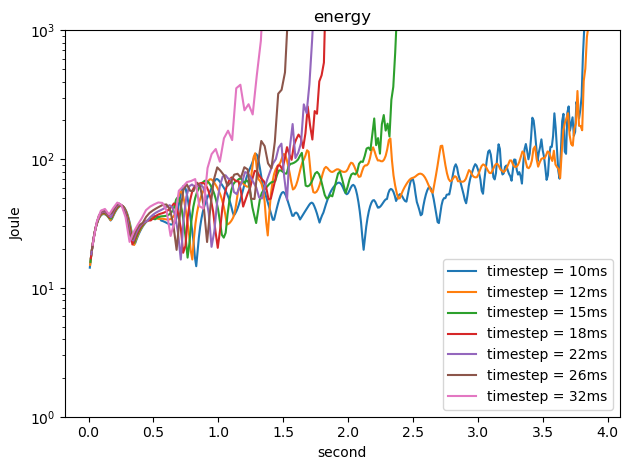

In [188]:
SIM_DURATION = 10 # (seconds)
TIMESTEPS = np.power(10, np.linspace(-2, -1.5, 7))

# get plotting axes
ax = plt.gca()

for dt in TIMESTEPS:
  # set timestep
  model.opt.timestep = dt

  # allocate
  n_steps = int(SIM_DURATION / model.opt.timestep)
  sim_time = np.zeros(n_steps)
  energy = np.zeros(n_steps) * np.nan
  speed = np.zeros(n_steps) * np.nan

  # initialize
  mujoco.mj_resetData(model, data)
  data.qvel[0] = 11 # set root joint velocity

  # simulate
  print('simulating {} steps at dt = {:2.2g}ms'.format(n_steps, 1000*dt))
  for i in range(n_steps):
    mujoco.mj_step(model, data)
    if data.warning.number.any():
      warning_index = np.nonzero(data.warning.number)[0][0]
      warning = mujoco.mjtWarning(warning_index).name
      print(f'stopped due to divergence ({warning}) at timestep {i}.\n')
      break
    sim_time[i] = data.time
    energy[i] = sum(abs(data.qvel))
    speed[i] = np.linalg.norm(data.qvel)

  # plot
  ax.plot(sim_time, energy, label='timestep = {:2.2g}ms'.format(1000*dt))
  ax.set_yscale('log')

# finalize plot
ax.set_ybound(1, 1e3)
ax.set_title('energy')
ax.set_ylabel('Joule')
ax.set_xlabel('second')
ax.legend(frameon=True, loc='lower right');
plt.tight_layout()

#  contact



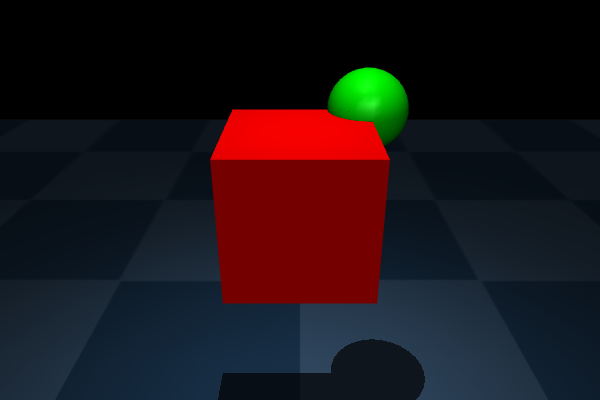

In [189]:
free_body_MJCF = """
<mujoco>
  <asset>
    <texture name="grid" type="2d" builtin="checker" rgb1=".1 .2 .3"
    rgb2=".2 .3 .4" width="300" height="300" mark="edge" markrgb=".2 .3 .4"/>
    <material name="grid" texture="grid" texrepeat="2 2" texuniform="true"
    reflectance=".2"/>
  </asset>

  <worldbody>
    <light pos="0 0 1" mode="trackcom"/>
    <geom name="ground" type="plane" pos="0 0 -.5" size="2 2 .1" material="grid" solimp=".99 .99 .01" solref=".001 1"/>
    <body name="box_and_sphere" pos="0 0 0">
      <freejoint/>
      <geom name="red_box" type="box" size=".1 .1 .1" rgba="1 0 0 1" solimp=".99 .99 .01"  solref=".001 1"/>
      <geom name="green_sphere" size=".06" pos=".1 .1 .1" rgba="0 1 0 1"/>
      <camera name="fixed" pos="0 -.6 .3" xyaxes="1 0 0 0 1 2"/>
      <camera name="track" pos="0 -.6 .3" xyaxes="1 0 0 0 1 2" mode="track"/>
    </body>
  </worldbody>
</mujoco>
"""
model = mujoco.MjModel.from_xml_string(free_body_MJCF)
data = mujoco.MjData(model)
height = 400
width = 600

with mujoco.Renderer(model, height, width) as renderer:
  mujoco.mj_forward(model, data)
  renderer.update_scene(data, "fixed")

  media.show_image(renderer.render())

In [190]:
n_frames = 200
height = 240
width = 320
frames = []

# visualize contact frames and forces, make body transparent
options = mujoco.MjvOption()
mujoco.mjv_defaultOption(options)
options.flags[mujoco.mjtVisFlag.mjVIS_CONTACTPOINT] = True
options.flags[mujoco.mjtVisFlag.mjVIS_CONTACTFORCE] = True
options.flags[mujoco.mjtVisFlag.mjVIS_TRANSPARENT] = True

# tweak scales of contact visualization elements
model.vis.scale.contactwidth = 0.1
model.vis.scale.contactheight = 0.03
model.vis.scale.forcewidth = 0.05
model.vis.map.force = 0.3

# random initial rotational velocity:
mujoco.mj_resetData(model, data)
data.qvel[3:6] = 5*np.random.randn(3)

# Simulate and display video.
with mujoco.Renderer(model, height, width) as renderer:
  for i in range(n_frames):
    while data.time < i/120.0: #1/4x real time
      mujoco.mj_step(model, data)
    renderer.update_scene(data, "track", options)
    frame = renderer.render()
    frames.append(frame)

media.show_video(frames, fps=30)

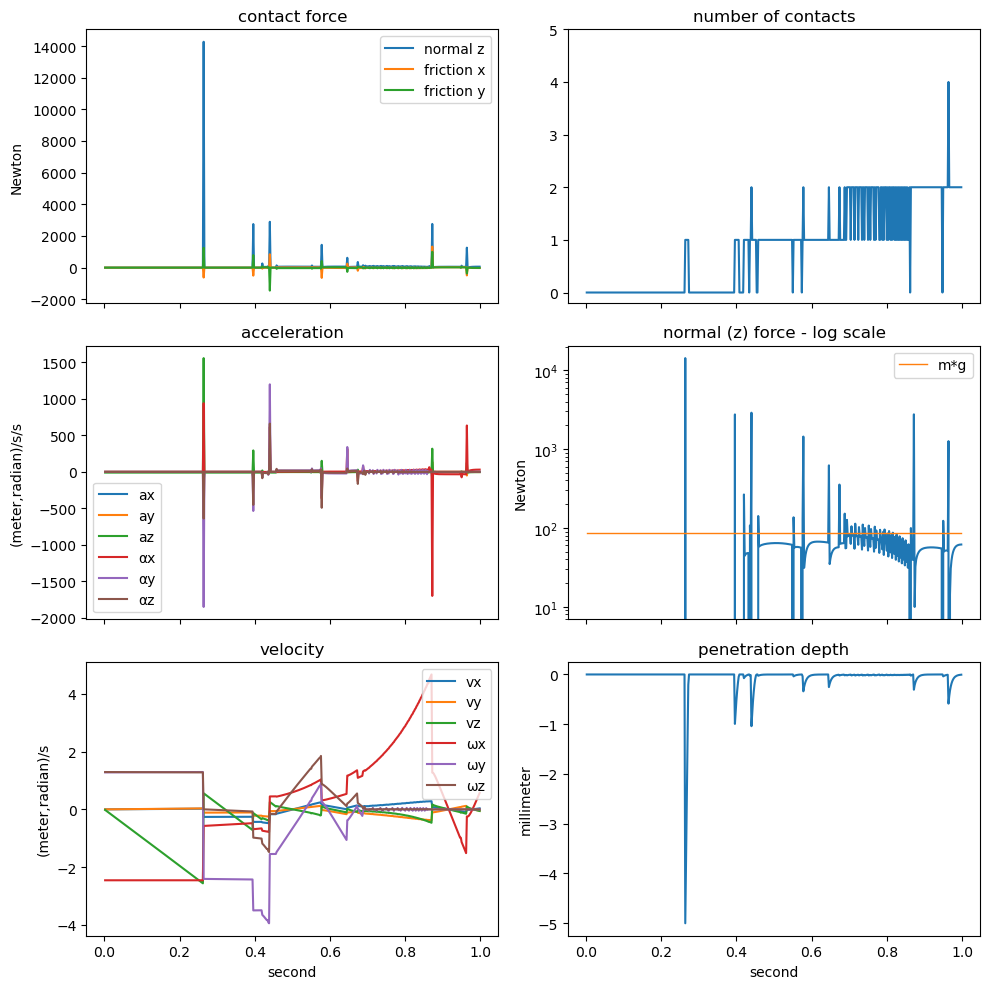

In [191]:
n_steps = 499

# allocate
sim_time = np.zeros(n_steps)
ncon = np.zeros(n_steps)
force = np.zeros((n_steps,3))
velocity = np.zeros((n_steps, model.nv))
penetration = np.zeros(n_steps)
acceleration = np.zeros((n_steps, model.nv))
forcetorque = np.zeros(6)

# random initial rotational velocity:
mujoco.mj_resetData(model, data)
data.qvel[3:6] = 2*np.random.randn(3)

# simulate and save data
for i in range(n_steps):
  mujoco.mj_step(model, data)
  sim_time[i] = data.time
  ncon[i] = data.ncon
  velocity[i] = data.qvel[:]
  acceleration[i] = data.qacc[:]
  # iterate over active contacts, save force and distance
  for j,c in enumerate(data.contact):
    mujoco.mj_contactForce(model, data, j, forcetorque)
    force[i] += forcetorque[0:3]
    penetration[i] = min(penetration[i], c.dist)
  # we could also do
  # force[i] += data.qfrc_constraint[0:3]
  # do you see why?

# plot
_, ax = plt.subplots(3, 2, sharex=True, figsize=(10, 10))

lines = ax[0,0].plot(sim_time, force)
ax[0,0].set_title('contact force')
ax[0,0].set_ylabel('Newton')
ax[0,0].legend(lines, ('normal z', 'friction x', 'friction y'));

ax[1,0].plot(sim_time, acceleration)
ax[1,0].set_title('acceleration')
ax[1,0].set_ylabel('(meter,radian)/s/s')
ax[1,0].legend(['ax', 'ay', 'az', 'αx', 'αy', 'αz'])

ax[2,0].plot(sim_time, velocity)
ax[2,0].set_title('velocity')
ax[2,0].set_ylabel('(meter,radian)/s')
ax[2,0].set_xlabel('second')
ax[2,0].legend(['vx', 'vy', 'vz', 'ωx', 'ωy', 'ωz'])

ax[0,1].plot(sim_time, ncon)
ax[0,1].set_title('number of contacts')
ax[0,1].set_yticks(range(6))

ax[1,1].plot(sim_time, force[:,0])
ax[1,1].set_yscale('log')
ax[1,1].set_title('normal (z) force - log scale')
ax[1,1].set_ylabel('Newton')
z_gravity = -model.opt.gravity[2]
mg = model.body("box_and_sphere").mass[0] * z_gravity
mg_line = ax[1,1].plot(sim_time, np.ones(n_steps)*mg, label='m*g', linewidth=1)
ax[1,1].legend()

ax[2,1].plot(sim_time, 1000*penetration)
ax[2,1].set_title('penetration depth')
ax[2,1].set_ylabel('millimeter')
ax[2,1].set_xlabel('second')

plt.tight_layout()

In [192]:
MJCF = """
<mujoco>
  <asset>
    <texture name="grid" type="2d" builtin="checker" rgb1=".1 .2 .3"
     rgb2=".2 .3 .4" width="300" height="300" mark="none"/>
    <material name="grid" texture="grid" texrepeat="6 6"
     texuniform="true" reflectance=".2"/>
     <material name="wall" rgba='.5 .5 .5 1'/>
  </asset>

  <default>
    <geom type="box" size=".05 .05 .05" />
    <joint type="free"/>
  </default>

  <worldbody>
    <light name="light" pos="-.2 0 1"/>
    <geom name="ground" type="plane" size=".5 .5 10" material="grid"
     zaxis="-.3 0 1" friction=".1"/>
    <camera name="y" pos="-.1 -.6 .3" xyaxes="1 0 0 0 1 2"/>
    <body pos="0 0 .1">
      <joint/>
      <geom/>
    </body>
    <body pos="0 .2 .1">
      <joint/>
      <geom friction=".33"/>
    </body>
  </worldbody>

</mujoco>
"""
n_frames = 60
height = 300
width = 300
frames = []

# load
model = mujoco.MjModel.from_xml_string(MJCF)
data = mujoco.MjData(model)

# Simulate and display video.
with mujoco.Renderer(model, height, width) as renderer:
  mujoco.mj_resetData(model, data)
  for i in range(n_frames):
    while data.time < i/30.0:
      mujoco.mj_step(model, data)
    renderer.update_scene(data, "y")
    frame = renderer.render()
    frames.append(frame)

media.show_video(frames, fps=30)


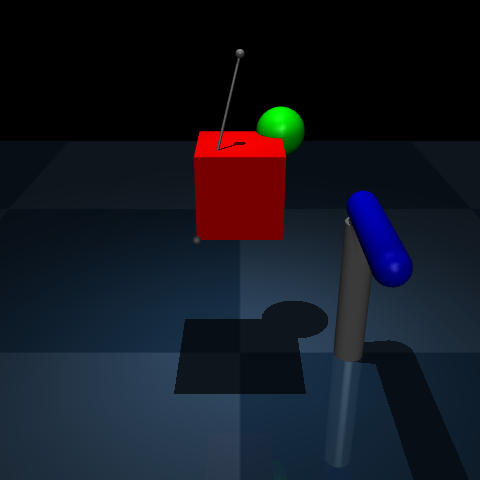

In [194]:
MJCF = """
<mujoco>
  <asset>
    <texture name="grid" type="2d" builtin="checker" rgb1=".1 .2 .3"
     rgb2=".2 .3 .4" width="300" height="300" mark="none"/>
    <material name="grid" texture="grid" texrepeat="1 1"
     texuniform="true" reflectance=".2"/>
  </asset>

  <worldbody>
    <light name="light" pos="0 0 1"/>
    <geom name="floor" type="plane" pos="0 0 -.5" size="2 2 .1" material="grid"/>
    <site name="anchor" pos="0 0 .3" size=".01"/>
    <camera name="fixed" pos="0 -1.3 .5" xyaxes="1 0 0 0 1 2"/>

    <geom name="pole" type="cylinder" fromto=".3 0 -.5 .3 0 -.1" size=".04"/>
    <body name="bat" pos=".3 0 -.1">
      <joint name="swing" type="hinge" damping="1" axis="0 0 1"/>
      <geom name="bat" type="capsule" fromto="0 0 .04 0 -.3 .04"
       size=".04" rgba="0 0 1 1"/>
    </body>

    <body name="box_and_sphere" pos="0 0 0">
      <joint name="free" type="free"/>
      <geom name="red_box" type="box" size=".1 .1 .1" rgba="1 0 0 1"/>
      <geom name="green_sphere"  size=".06" pos=".1 .1 .1" rgba="0 1 0 1"/>
      <site name="hook" pos="-.1 -.1 -.1" size=".01"/>
      <site name="IMU"/>
    </body>
  </worldbody>

  <tendon>
    <spatial name="wire" limited="true" range="0 0.35" width="0.003">
      <site site="anchor"/>
      <site site="hook"/>
    </spatial>
  </tendon>

  <actuator>
    <motor name="my_motor" joint="swing" gear="1"/>
  </actuator>

  <sensor>
    <accelerometer name="accelerometer" site="IMU"/>
  </sensor>
</mujoco>
"""
model = mujoco.MjModel.from_xml_string(MJCF)
data = mujoco.MjData(model)
height = 480
width = 480

with mujoco.Renderer(model, height, width) as renderer:
  mujoco.mj_forward(model, data)
  renderer.update_scene(data, "fixed")

  media.show_image(renderer.render())

n_frames = 180
height = 240
width = 320
frames = []
fps = 60.0
times = []
sensordata = []

# constant actuator signal
mujoco.mj_resetData(model, data)
data.ctrl = 20

# Simulate and display video.
with mujoco.Renderer(model, height, width) as renderer:
  for i in range(n_frames):
    while data.time < i/fps:
      mujoco.mj_step(model, data)
      times.append(data.time)
      sensordata.append(data.sensor('accelerometer').data.copy())
    renderer.update_scene(data, "fixed")
    frame = renderer.render()
    frames.append(frame)

media.show_video(frames, fps=fps)

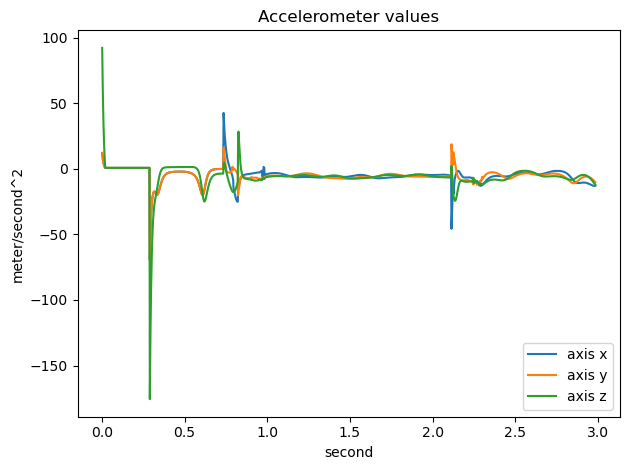

In [195]:
ax = plt.gca()

ax.plot(np.asarray(times), np.asarray(sensordata), label=[f"axis {v}" for v in ['x', 'y', 'z']])

# finalize plot
ax.set_title('Accelerometer values')
ax.set_ylabel('meter/second^2')
ax.set_xlabel('second')
ax.legend(frameon=True, loc='lower right')
plt.tight_layout()

In [197]:
# Get MuJoCo's standard humanoid model.
print('Getting MuJoCo humanoid XML description from GitHub:')

with open('mujoco/model/humanoid/humanoid.xml', 'r') as f:
  xml = f.read()

# Load the model, make two MjData's.
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)
data2 = mujoco.MjData(model)

# Episode parameters.
duration = 3       # (seconds)
framerate = 60     # (Hz)
data.qpos[0:2] = [-.5, -.5]  # Initial x-y position (m)
data.qvel[2] = 4   # Initial vertical velocity (m/s)
ctrl_phase = 2 * np.pi * np.random.rand(model.nu)  # Control phase
ctrl_freq = 1     # Control frequency

# Visual options for the "ghost" model.
vopt2 = mujoco.MjvOption()
vopt2.flags[mujoco.mjtVisFlag.mjVIS_TRANSPARENT] = True  # Transparent.
pert = mujoco.MjvPerturb()  # Empty MjvPerturb object
# We only want dynamic objects (the humanoid). Static objects (the floor)
# should not be re-drawn. The mjtCatBit flag lets us do that, though we could
# equivalently use mjtVisFlag.mjVIS_STATIC
catmask = mujoco.mjtCatBit.mjCAT_DYNAMIC

# Simulate and render.
frames = []
with mujoco.Renderer(model, 480, 640) as renderer:
  while data.time < duration:
    # Sinusoidal control signal.
    data.ctrl = np.sin(ctrl_phase + 2 * np.pi * data.time * ctrl_freq)
    mujoco.mj_step(model, data)
    if len(frames) < data.time * framerate:
      # This draws the regular humanoid from `data`.
      renderer.update_scene(data)

      # Copy qpos to data2, move the humanoid sideways, call mj_forward.
      data2.qpos = data.qpos
      data2.qpos[0] += 1.5
      data2.qpos[1] += 1
      mujoco.mj_forward(model, data2)

      # Call mjv_addGeoms to add the ghost humanoid to the scene.
      mujoco.mjv_addGeoms(model, data2, vopt2, pert, catmask, renderer.scene)

      # Render and add the frame.
      pixels = renderer.render()
      frames.append(pixels)

# Render video at half real-time.
media.show_video(frames, fps=framerate/2)

Getting MuJoCo humanoid XML description from GitHub:


In [199]:
#@title Load the "dominos" model

dominos_xml = """
<mujoco>
  <asset>
    <texture type="skybox" builtin="gradient" rgb1=".3 .5 .7" rgb2="0 0 0" width="32" height="512"/>
    <texture name="grid" type="2d" builtin="checker" width="512" height="512" rgb1=".1 .2 .3" rgb2=".2 .3 .4"/>
    <material name="grid" texture="grid" texrepeat="2 2" texuniform="true" reflectance=".2"/>
  </asset>

  <statistic meansize=".01"/>

  <visual>
    <global offheight="2160" offwidth="3840"/>
    <quality offsamples="8"/>
  </visual>

  <default>
    <geom type="box" solref=".005 1"/>
    <default class="static">
      <geom rgba=".3 .5 .7 1"/>
    </default>
  </default>

  <option timestep="5e-4"/>

  <worldbody>
    <light pos=".3 -.3 .8" mode="trackcom" diffuse="1 1 1" specular=".3 .3 .3"/>
    <light pos="0 -.3 .4" mode="targetbodycom" target="box" diffuse=".8 .8 .8" specular=".3 .3 .3"/>
    <geom name="floor" type="plane" size="3 3 .01" pos="-0.025 -0.295  0" material="grid"/>
    <geom name="ramp" pos=".25 -.45 -.03" size=".04 .1 .07" euler="-30 0 0" class="static"/>
    <camera name="top" pos="-0.37 -0.78 0.49" xyaxes="0.78 -0.63 0 0.27 0.33 0.9"/>

    <body name="ball" pos=".25 -.45 .1">
      <freejoint name="ball"/>
      <geom name="ball" type="sphere" size=".02" rgba=".65 .81 .55 1"/>
    </body>

    <body pos=".26 -.3 .03" euler="0 0 -90.0">
      <freejoint/>
      <geom size=".0015 .015 .03" rgba="1 .5 .5 1"/>
    </body>

    <body pos=".26 -.27 .04" euler="0 0 -81.0">
      <freejoint/>
      <geom size=".002 .02 .04" rgba="1 1 .5 1"/>
    </body>

    <body pos=".24 -.21 .06" euler="0 0 -63.0">
      <freejoint/>
      <geom size=".003 .03 .06" rgba=".5 1 .5 1"/>
    </body>

    <body pos=".2 -.16 .08" euler="0 0 -45.0">
      <freejoint/>
      <geom size=".004 .04 .08" rgba=".5 1 1 1"/>
    </body>

    <body pos=".15 -.12 .1" euler="0 0 -27.0">
      <freejoint/>
      <geom size=".005 .05 .1" rgba=".5 .5 1 1"/>
    </body>

    <body pos=".09 -.1 .12" euler="0 0 -9.0">
      <freejoint/>
      <geom size=".006 .06 .12" rgba="1 .5 1 1"/>
    </body>

    <body name="seasaw_wrapper" pos="-.23 -.1 0" euler="0 0 30">
      <geom size=".01 .01 .015" pos="0 .05 .015" class="static"/>
      <geom size=".01 .01 .015" pos="0 -.05 .015" class="static"/>
      <geom type="cylinder" size=".01 .0175" pos="-.09 0 .0175" class="static"/>
      <body name="seasaw" pos="0 0 .03">
        <joint axis="0 1 0"/>
        <geom type="cylinder" size=".005 .039" zaxis="0 1 0" rgba=".84 .15 .33 1"/>
        <geom size=".1 .02 .005" pos="0 0 .01" rgba=".84 .15 .33 1"/>
      </body>
    </body>

    <body name="box" pos="-.3 -.14 .05501" euler="0 0 -30">
      <freejoint name="box"/>
      <geom name="box" size=".01 .01 .01" rgba=".0 .7 .79 1"/>
    </body>
  </worldbody>
</mujoco>
"""
model = mujoco.MjModel.from_xml_string(dominos_xml)
data = mujoco.MjData(model)
#@title Render from fixed camera

duration = 2.5  # (seconds)
framerate = 60  # (Hz)
height = 1024
width = 1440

# Simulate and display video.
frames = []
mujoco.mj_resetData(model, data)  # Reset state and time.
with mujoco.Renderer(model, height, width) as renderer:
  while data.time < duration:
    mujoco.mj_step(model, data)
    if len(frames) < data.time * framerate:
      renderer.update_scene(data, camera='top')
      pixels = renderer.render()
      frames.append(pixels)

media.show_video(frames, fps=framerate)

In [200]:
#@title Render from moving camera

duration = 3  # (seconds)
height = 1024
width = 1440

# find time when box is thrown (speed > 2cm/s)
throw_time = 0.0
mujoco.mj_resetData(model, data)
while data.time < duration and not throw_time:
  mujoco.mj_step(model, data)
  box_speed = np.linalg.norm(data.joint('box').qvel[:3])
  if box_speed > 0.02:
    throw_time = data.time
assert throw_time > 0

def mix(time, t0=0.0, width=1.0):
  """Sigmoidal mixing function."""
  t = (time - t0) / width
  s = 1 / (1 + np.exp(-t))
  return 1 - s, s

def unit_cos(t):
  """Unit cosine sigmoid from (0,0) to (1,1)."""
  return 0.5 - np.cos(np.pi*np.clip(t, 0, 1))/2

def orbit_motion(t):
  """Return orbit trajectory."""
  distance = 0.9
  azimuth = 140 + 100 * unit_cos(t)
  elevation = -30
  lookat = data.geom('floor').xpos.copy()
  return distance, azimuth, elevation, lookat

def track_motion():
  """Return box-track trajectory."""
  distance = 0.08
  azimuth = 280
  elevation = -10
  lookat = data.geom('box').xpos.copy()
  return distance, azimuth, elevation, lookat

def cam_motion():
  """Return sigmoidally-mixed {orbit, box-track} trajectory."""
  d0, a0, e0, l0 = orbit_motion(data.time / throw_time)
  d1, a1, e1, l1 = track_motion()
  mix_time = 0.3
  w0, w1 = mix(data.time, throw_time, mix_time)
  return w0*d0+w1*d1, w0*a0+w1*a1, w0*e0+w1*e1, w0*l0+w1*l1

# Make a camera.
cam = mujoco.MjvCamera()
mujoco.mjv_defaultCamera(cam)

# Simulate and display video.
framerate = 60  # (Hz)
slowdown = 4    # 4x slow-down
mujoco.mj_resetData(model, data)
frames = []
with mujoco.Renderer(model, height, width) as renderer:
  while data.time < duration:
    mujoco.mj_step(model, data)
    if len(frames) < data.time * framerate * slowdown:
      cam.distance, cam.azimuth, cam.elevation, cam.lookat = cam_motion()
      renderer.update_scene(data, cam)
      pixels = renderer.render()
      frames.append(pixels)

media.show_video(frames, fps=framerate)